## Kernal Support Vector Machines

In [2]:
# Build and train a Kernal Support Vector Machine.
# Vary the Regularization parameters (C and Gamma)
# Select the optimal value of parameters and justify your choice.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

x_train = pd.read_csv('Data/X_train.csv', header=None).values

y_train = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

x_test = pd.read_csv('Data/X_test.csv', header=None).values

y_test = pd.read_csv('Data/y_test.csv', header=None).values.ravel()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)
(5000, 784)
(5000,)


[0.9199999999999999, 0.9386666666666666, 0.9200666666666666]
[0.8953, 0.8946, 0.8952]


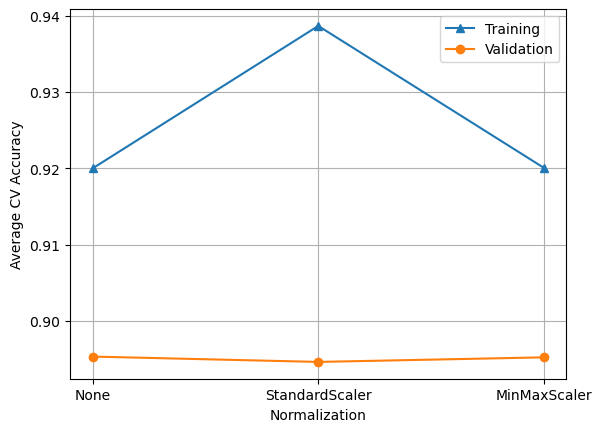

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

normalization_techniques = ["None", "StandardScaler", "MinMaxScaler"]

val_acc = []
train_acc = []

for norm in normalization_techniques:
    if norm == "StandardScaler":
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(X)
    if norm == "MinMaxScaler":
        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(X)
    if norm == "None":
        x_scaled = X
        
    clf = SVC(random_state=16)
    
    cv_results = cross_validate(clf, x_scaled, y, scoring="accuracy", cv=4, return_train_score=True)
    train_acc.append(np.mean(cv_results["train_score"]))
    val_acc.append(np.mean(cv_results["test_score"]))

print(train_acc)
print(val_acc)
x_axis = normalization_techniques
plt.plot(x_axis, train_acc, marker="^", label="Training")
plt.plot(x_axis, val_acc, marker="o", label="Validation")
plt.grid()
plt.xlabel('Normalization')
plt.ylabel('Average CV Accuracy')
plt.legend()
plt.show()


[0.8951, 0.8731000000000001, 0.45360000000000006]


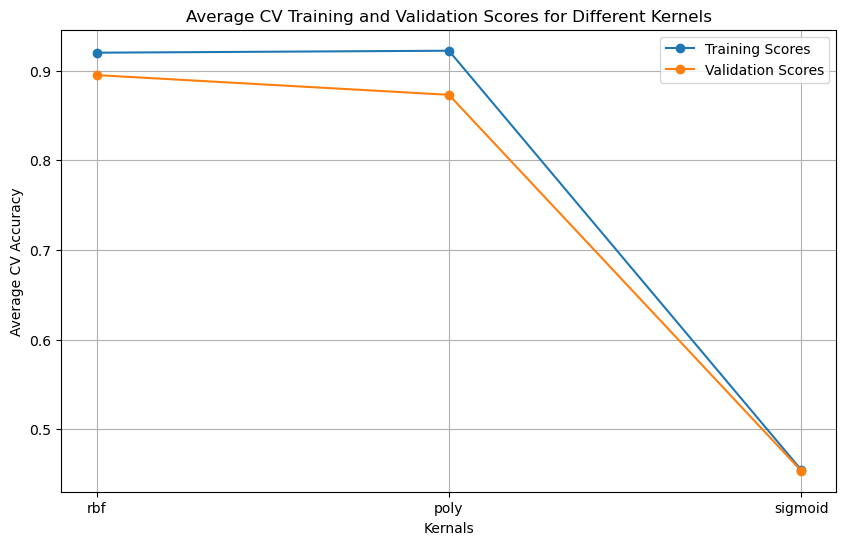

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

kernal_values = ['rbf', 'poly', 'sigmoid']

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for kernel in kernal_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        svm_classifier = SVC(kernel=kernel, random_state=16)
        svm_classifier.fit(X_train, y_train)
        fold_training_scores.append(svm_classifier.score(X_train, y_train))
        fold_validation_scores.append(svm_classifier.score(X_test, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))

print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(kernal_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(kernal_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('Kernals')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different Kernels')
plt.legend()
plt.grid(True)
plt.show()

[0.2142, 0.7825, 0.8546, 0.8951, 0.9058, 0.9079999999999999]


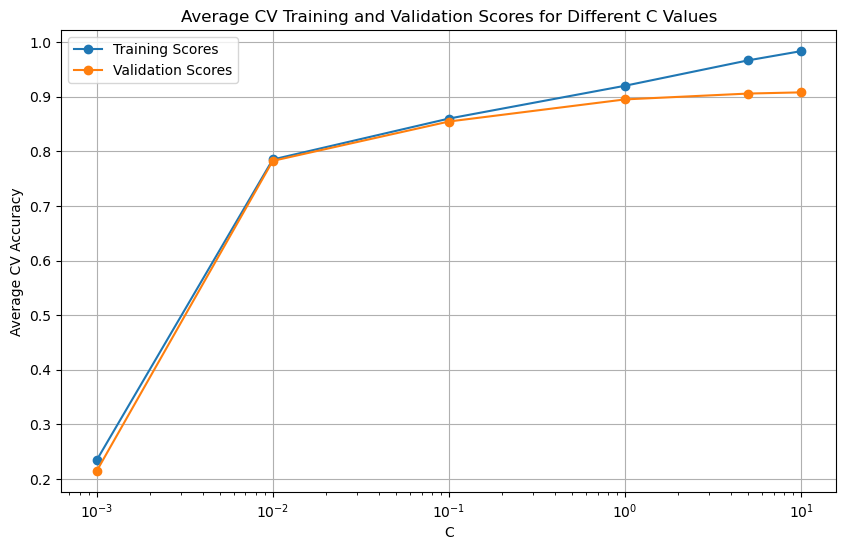

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

C_values = [0.001, 0.01, 0.1, 1, 5, 10]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for C in C_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        svm_classifier = SVC(kernel='rbf', C=C, random_state=16)
        svm_classifier.fit(X_train, y_train)
        fold_training_scores.append(svm_classifier.score(X_train, y_train))
        fold_validation_scores.append(svm_classifier.score(X_test, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(C_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(C_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different C Values')
plt.legend()
plt.grid(True)
plt.show()

[0.1847, 0.1847, 0.1847, 0.1847, 0.1847]


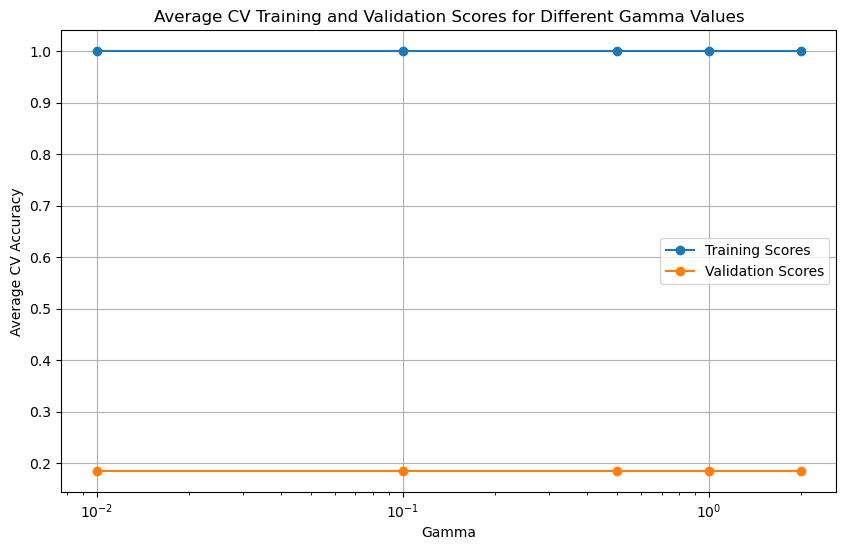

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

Gamma_Values = [0.01, 0.1, 0.5, 1, 2]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for gamma in Gamma_Values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        svm_classifier = SVC(kernel='rbf', gamma=gamma, C=10, random_state=16)
        svm_classifier.fit(X_train, y_train)
        fold_training_scores.append(svm_classifier.score(X_train, y_train))
        fold_validation_scores.append(svm_classifier.score(X_test, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))
    
print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(Gamma_Values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(Gamma_Values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different Gamma Values')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Load the training data
X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

svm_classifier = SVC(kernel='rbf', random_state=16)

# Define a parameter grid
param_grid = {
    'C': [10],
}

# Perform 4-fold cross-validation and grid search
grid_search = GridSearchCV(svm_classifier, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X, y)

print(f"Best C value for Kernel SVM: {grid_search.best_params_['C']}")
print(f"Best cross-validation accuracy for Kernel SVM: {grid_search.best_score_}")

Best C value for Kernel SVM: 10
Best cross-validation accuracy for Kernel SVM: 0.907


In [10]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

x_train = pd.read_csv('Data/X_train.csv', header=None).values

y_train = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

x_test = pd.read_csv('Data/X_test.csv', header=None).values

y_test = pd.read_csv('Data/y_test.csv', header=None).values.ravel()

svm_classifier = SVC(kernel='rbf', C=10, random_state=16)
svm_classifier.fit(x_train, y_train)

print(f"Kernel SVM Classifier training score: {svm_classifier.score(x_train, y_train)}")
print("Best cross-validation accuracy for Kernel SVM: 0.907")
print(f"Kernel SVM Classifier testing score: {svm_classifier.score(x_test, y_test)}")

Kernel SVM Classifier training score: 0.9823
Best cross-validation accuracy for Kernel SVM: 0.907
Kernel SVM Classifier testing score: 0.8968


# Multilayer Perceptrons

[0.9401, 1.0, 0.9989666666666667]
[0.8644999999999999, 0.8977, 0.893]


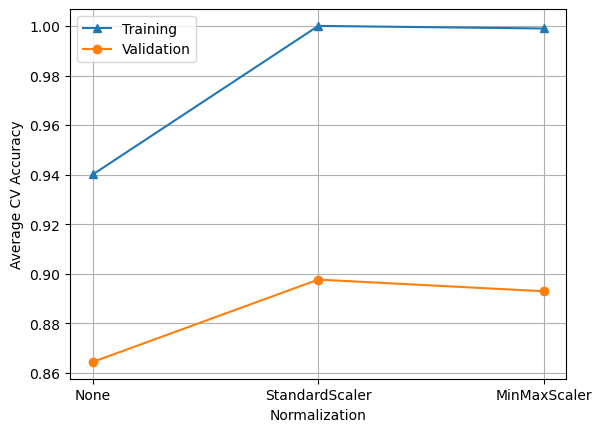

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

normalization_techniques = ["None", "StandardScaler", "MinMaxScaler"]

val_acc = []
train_acc = []

for norm in normalization_techniques:
    if norm == "StandardScaler":
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(X)
    if norm == "MinMaxScaler":
        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(X)
    if norm == "None":
        x_scaled = X
        
    clf = MLPClassifier(max_iter=1000, random_state=16)
    
    cv_results = cross_validate(clf, x_scaled, y, scoring="accuracy", cv=4, return_train_score=True)
    train_acc.append(np.mean(cv_results["train_score"]))
    val_acc.append(np.mean(cv_results["test_score"]))

print(train_acc)
print(val_acc)
x_axis = normalization_techniques
plt.plot(x_axis, train_acc, marker="^", label="Training")
plt.plot(x_axis, val_acc, marker="o", label="Validation")
plt.grid()
plt.xlabel('Normalization')
plt.ylabel('Average CV Accuracy')
plt.legend()
plt.show()

[0.8944, 0.8973, 0.8993, 0.8921000000000001, 0.8956, 0.897]


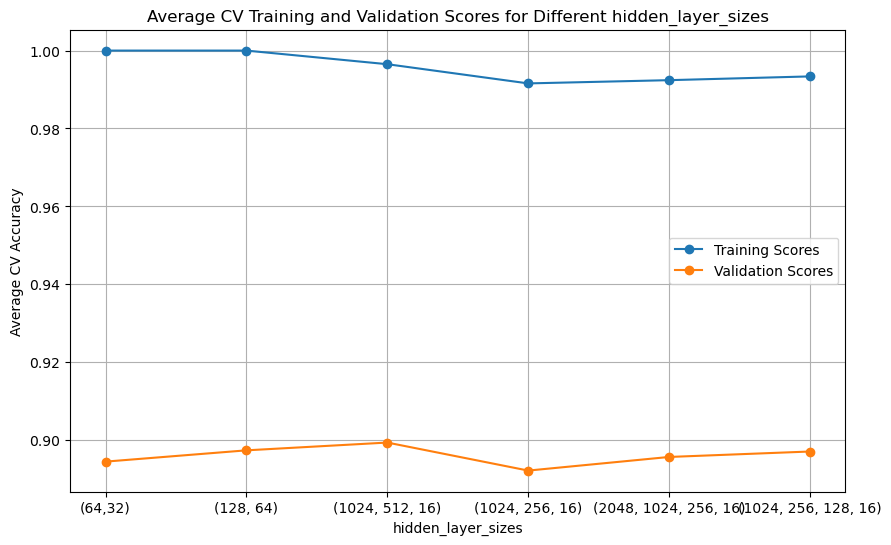

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

hidden_layer_sizes_strings = ["(64,32)", "(128, 64)", "(1024, 512, 16)", "(1024, 256, 16)", "(2048, 1024, 256, 16)", "(1024, 256, 128, 16)"]

hidden_layer_sizes_values = [(64,32), (128, 64), (1024, 512, 16), (1024, 256, 16), (2048, 1024, 256, 16), (1024, 256, 128, 16)]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for hidden_layer_sizes in hidden_layer_sizes_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        # use standard scalar
        scaler_standard = StandardScaler()
        X_train_standard = scaler_standard.fit_transform(X_train)
        X_test_standard = scaler_standard.transform(X_test)
        mlp_classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=1000, random_state=16)              
        mlp_classifier.fit(X_train_standard, y_train)
        fold_training_scores.append(mlp_classifier.score(X_train_standard, y_train))
        fold_validation_scores.append(mlp_classifier.score(X_test_standard, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))

print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes_strings, mean_training_scores, label='Training Scores', marker='o')
plt.plot(hidden_layer_sizes_strings, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('hidden_layer_sizes')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different hidden_layer_sizes')
plt.legend()
plt.grid(True)
plt.show()

[0.8938999999999999, 0.8935000000000001, 0.8936000000000001, 0.8568]


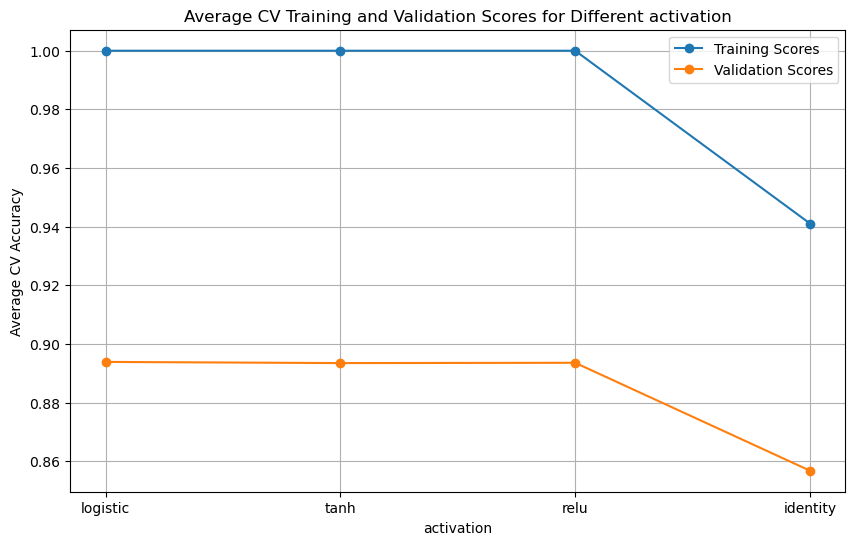

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

activation_values = ["logistic", "tanh", "relu", "identity"]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for activation in activation_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        # use standard scalar
        scaler_standard = StandardScaler()
        X_train_standard = scaler_standard.fit_transform(X_train)
        X_test_standard = scaler_standard.transform(X_test)
        mlp_classifier = MLPClassifier(activation=activation, max_iter=1000, random_state=16)              
        mlp_classifier.fit(X_train_standard, y_train)
        fold_training_scores.append(mlp_classifier.score(X_train_standard, y_train))
        fold_validation_scores.append(mlp_classifier.score(X_test_standard, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))

print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(activation_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(activation_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('activation')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different activation')
plt.legend()
plt.grid(True)
plt.show()

[0.8936000000000001, 0.8948, 0.8831]


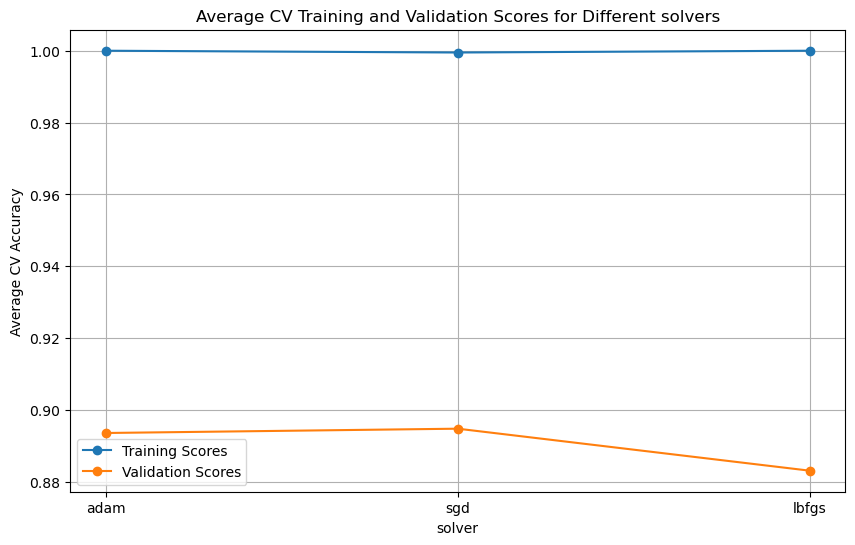

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

solver_values = ["adam", "sgd", "lbfgs"]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for solver in solver_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        # use standard scalar
        scaler_standard = StandardScaler()
        X_train_standard = scaler_standard.fit_transform(X_train)
        X_test_standard = scaler_standard.transform(X_test)
        mlp_classifier = MLPClassifier(solver=solver, max_iter=1000, random_state=16)              
        mlp_classifier.fit(X_train_standard, y_train)
        fold_training_scores.append(mlp_classifier.score(X_train_standard, y_train))
        fold_validation_scores.append(mlp_classifier.score(X_test_standard, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))

print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(solver_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(solver_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('solver')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different solvers')
plt.legend()
plt.grid(True)
plt.show()

[0.8936000000000001, 0.8936000000000001, 0.8936000000000001]


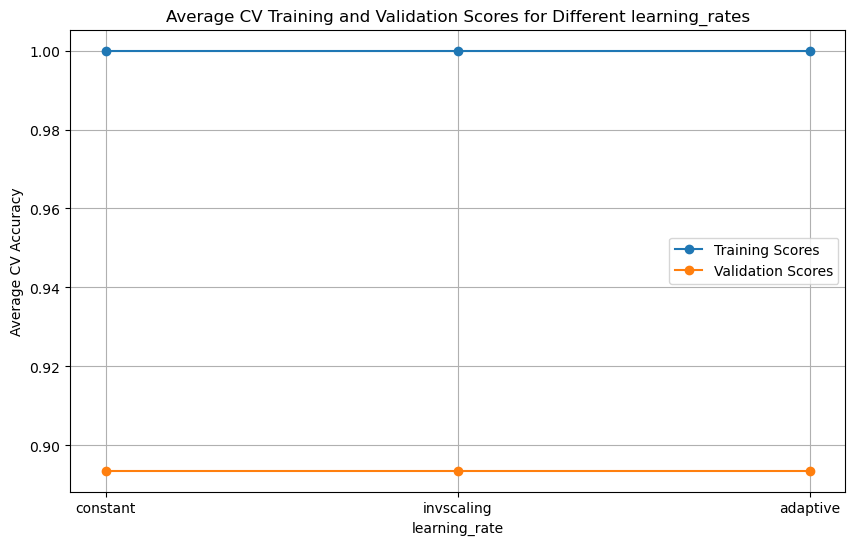

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

learning_rate_values = ['constant', 'invscaling', 'adaptive']

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for learning_rate in learning_rate_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        # use standard scalar
        scaler_standard = StandardScaler()
        X_train_standard = scaler_standard.fit_transform(X_train)
        X_test_standard = scaler_standard.transform(X_test)
        mlp_classifier = MLPClassifier(learning_rate=learning_rate, max_iter=1000, random_state=16)              
        mlp_classifier.fit(X_train_standard, y_train)
        fold_training_scores.append(mlp_classifier.score(X_train_standard, y_train))
        fold_validation_scores.append(mlp_classifier.score(X_test_standard, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))

print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(learning_rate_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xlabel('learning_rate')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different learning_rates')
plt.legend()
plt.grid(True)
plt.show()

[0.8946, 0.8936000000000001, 0.8847999999999999, 0.828, 0.8132, 0.8164]


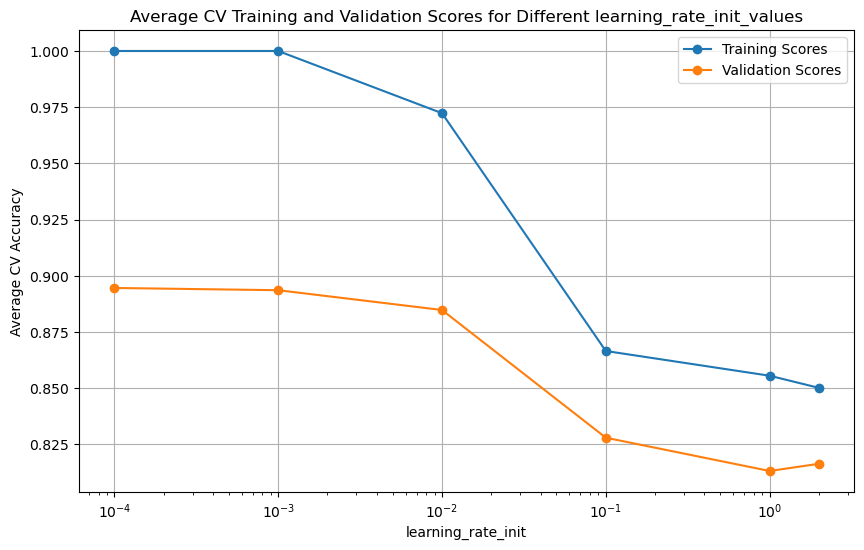

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

learning_rate_init_values = [0.0001, 0.001, 0.01, 0.1, 1, 2]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for learning_rate_init in learning_rate_init_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        # use standard scalar
        scaler_standard = StandardScaler()
        X_train_standard = scaler_standard.fit_transform(X_train)
        X_test_standard = scaler_standard.transform(X_test)
        mlp_classifier = MLPClassifier(learning_rate_init=learning_rate_init, max_iter=1000, random_state=16)              
        mlp_classifier.fit(X_train_standard, y_train)
        fold_training_scores.append(mlp_classifier.score(X_train_standard, y_train))
        fold_validation_scores.append(mlp_classifier.score(X_test_standard, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))

print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_init_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(learning_rate_init_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xscale('log')
plt.xlabel('learning_rate_init')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different learning_rate_init_values')
plt.legend()
plt.grid(True)
plt.show()

[0.8932, 0.8956, 0.8957, 0.8980999999999999, 0.8992]


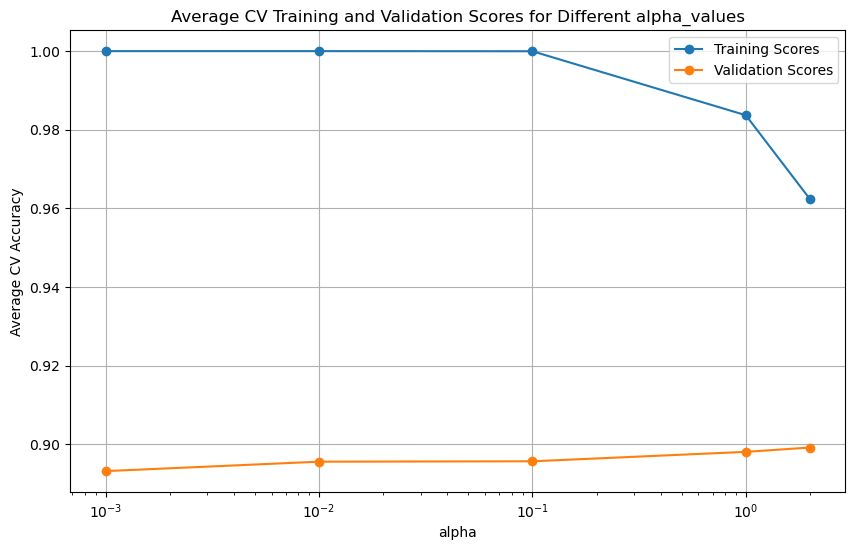

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

mean_validation_scores = []  # Store the mean validation scores
mean_training_scores = [] # Store the mean training scores

alpha_values = [0.001, 0.01, 0.1, 1, 2]

cv = KFold(n_splits=4, random_state=38, shuffle=True)

for alpha in alpha_values:
    fold_validation_scores = []  # Store val scores for each fold
    fold_training_scores = [] # Store traing scores for each fold
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        # use standard scalar
        scaler_standard = StandardScaler()
        X_train_standard = scaler_standard.fit_transform(X_train)
        X_test_standard = scaler_standard.transform(X_test)
        mlp_classifier = MLPClassifier(alpha=alpha, max_iter=1000, random_state=16)              
        mlp_classifier.fit(X_train_standard, y_train)
        fold_training_scores.append(mlp_classifier.score(X_train_standard, y_train))
        fold_validation_scores.append(mlp_classifier.score(X_test_standard, y_test))
    
    # Calculate and store the mean scores
    mean_training_scores.append(np.mean(fold_training_scores))
    mean_validation_scores.append(np.mean(fold_validation_scores))

print(mean_validation_scores)
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, mean_training_scores, label='Training Scores', marker='o')
plt.plot(alpha_values, mean_validation_scores, label='Validation Scores', marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Average CV Accuracy')
plt.title('Average CV Training and Validation Scores for Different alpha_values')
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load the training data
X = pd.read_csv('Data/X_train.csv', header=None).values
y = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

# use standard scalar
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X)

mlp_classifier = MLPClassifier(max_iter=1000, random_state=16)

# Define a parameter grid
param_grid = {
    'hidden_layer_sizes': [(1024, 512, 16)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'learning_rate': ['constant'],
    'learning_rate_init': [0.0001],
    'alpha': [1],
}

# Perform 4-fold cross-validation and grid search
grid_search = GridSearchCV(mlp_classifier, param_grid, cv=4, scoring='accuracy')
grid_search.fit(X_standard, y)

print(f"Best hidden_layer_sizes value for MLPClassifier: {grid_search.best_params_['hidden_layer_sizes']}")
print(f"Best activation value for MLPClassifier: {grid_search.best_params_['activation']}")
print(f"Best solver value for MLPClassifier: {grid_search.best_params_['solver']}")
print(f"Best learning_rate value for MLPClassifier: {grid_search.best_params_['learning_rate']}")
print(f"Best learning_rate_init value for MLPClassifier: {grid_search.best_params_['learning_rate_init']}")
print(f"Best alpha value for MLPClassifier: {grid_search.best_params_['alpha']}")
print(f"Best cross-validation accuracy for MLPClassifier: {grid_search.best_score_}")

C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best hidden_layer_sizes value for MLPClassifier: (1024, 512, 16)
Best activation value for MLPClassifier: relu
Best solver value for MLPClassifier: sgd
Best learning_rate value for MLPClassifier: constant
Best learning_rate_init value for MLPClassifier: 0.0001
Best alpha value for MLPClassifier: 1
Best cross-validation accuracy for MLPClassifier: 0.9002999999999999


C:\ProgramData\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x_train = pd.read_csv('Data/X_train.csv', header=None).values

y_train = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

x_test = pd.read_csv('Data/X_test.csv', header=None).values

y_test = pd.read_csv('Data/y_test.csv', header=None).values.ravel()

# use standard scalar
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(x_train)
X_test_standard = scaler_standard.transform(x_test)

mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(1024, 512, 16),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.0001,
    alpha=1,
    max_iter=1000,
    random_state=16)
mlp_classifier.fit(X_train_standard, y_train)

print(f"MLPClassifier training score: {mlp_classifier.score(X_train_standard, y_train)}")
print("Best cross-validation accuracy for MLPClassifier: 0.90029")
print(f"MLPClassifier testing score: {mlp_classifier.score(X_test_standard, y_test)}")

MLPClassifier training score: 0.9987
Best cross-validation accuracy for MLPClassifier: 0.90029
MLPClassifier testing score: 0.8932


# Correlation Between the Classifiers (using predict_proba)

In [33]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x_train = pd.read_csv('Data/X_train.csv', header=None).values

y_train = pd.read_csv('Data/y_train.csv', header=None).values.ravel()

x_test = pd.read_csv('Data/X_test.csv', header=None).values

y_test = pd.read_csv('Data/y_test.csv', header=None).values.ravel()

svm_classifier_op = SVC(kernel='rbf', C=10, random_state=16, probability=True)
svm_classifier_op.fit(x_train, y_train)

# use standard scalar
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(x_train)
X_test_standard = scaler_standard.transform(x_test)

mlp_classifier_op = MLPClassifier(
    hidden_layer_sizes=(1024, 512, 16),
    activation='relu',
    solver='adam',
    learning_rate='constant',
    learning_rate_init=0.0001,
    alpha=1,
    max_iter=1000,
    random_state=16)
mlp_classifier_op.fit(X_train_standard, y_train)

print(f"Kernel SVM Classifier testing score: {svm_classifier_op.score(x_test, y_test)}")
print(f"MLPClassifier testing score: {mlp_classifier_op.score(X_test_standard, y_test)}")

# Get the predict_proba values for both classifiers
svm_proba = svm_classifier_op.predict_proba(x_test)
mlp_proba = mlp_classifier_op.predict_proba(X_test_standard)


Kernel SVM Classifier testing score: 0.8968
MLPClassifier testing score: 0.8932


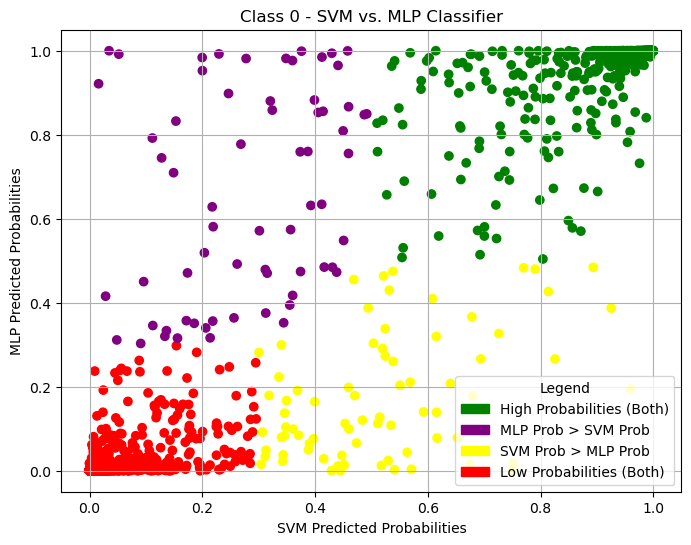

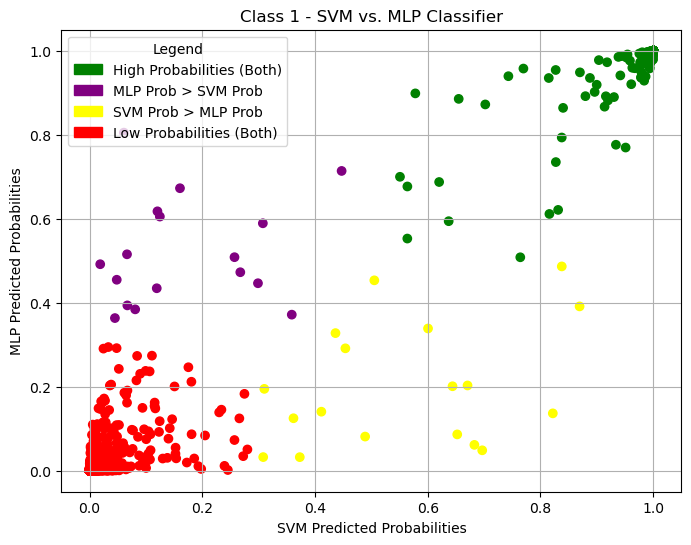

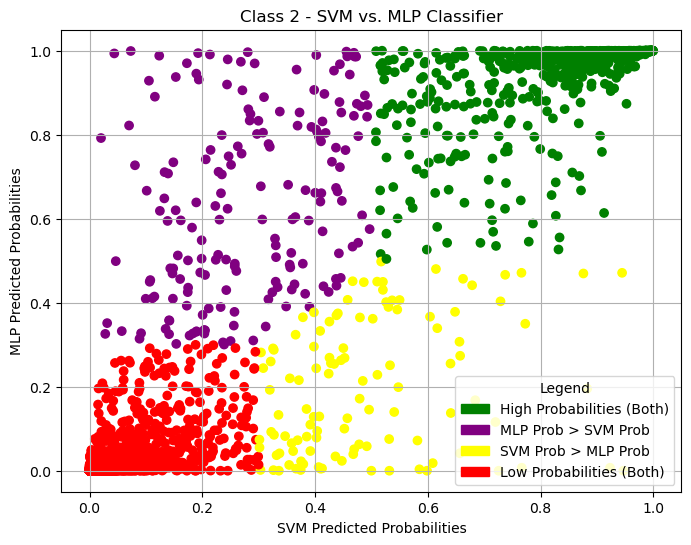

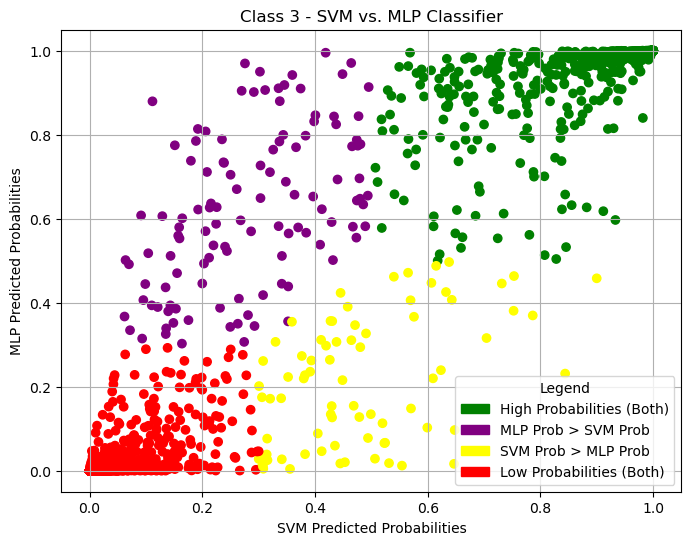

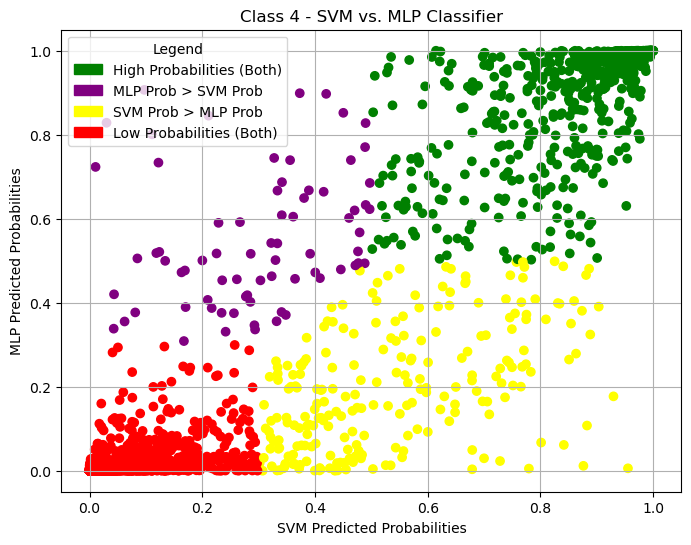

In [34]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a list of class labels (0, 1, 2, 3, 4)
class_labels = [0, 1, 2, 3, 4]

# Create a separate plot for each class
for class_label in class_labels:
    # Extract the class-specific probabilities from both classifiers
    svm_class_proba = svm_proba[:, class_label]
    mlp_class_proba = mlp_proba[:, class_label]

    # Color selection
    # Define colors based on classifier performance
    colors = []
    labels = []

    for svm_prob, mlp_prob in zip(svm_class_proba, mlp_class_proba):
        if svm_prob < 0.3 and mlp_prob < 0.3:
            colors.append('red')
            labels.append('Low Probabilities (Both)')
        elif svm_prob > 0.5 and mlp_prob > 0.5:
            colors.append('green')
            labels.append('High Probabilities (Both)')
        elif svm_prob > mlp_prob:
            colors.append('yellow')
            labels.append('Higher SVM Probability')
        elif mlp_prob > svm_prob:
            colors.append('purple')
            labels.append('Higher MLP Probability')

    # Create a scatter plot for the class-specific probabilities, with different colors
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(svm_class_proba, mlp_class_proba, c=colors)

    # Create custom legend elements
    green_patch = mpatches.Patch(color='green', label='High Probabilities (Both)')
    yellow_patch = mpatches.Patch(color='yellow', label='SVM Prob > MLP Prob')
    purple_patch = mpatches.Patch(color='purple', label='MLP Prob > SVM Prob')
    red_patch = mpatches.Patch(color='red', label='Low Probabilities (Both)')

    # Add a custom legend
    plt.legend(handles=[green_patch, purple_patch, yellow_patch, red_patch], title="Legend")

    plt.title(f'Class {class_label} - SVM vs. MLP Classifier')
    plt.xlabel('SVM Predicted Probabilities')
    plt.ylabel('MLP Predicted Probabilities')
    plt.grid(True)
    plt.show()


In [48]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x_train = pd.read_csv('Data/X_train.csv', header=None).values
y_train = pd.read_csv('Data/y_train.csv', header=None).values.ravel()
x_test = pd.read_csv('Data/X_test.csv', header=None).values
y_test = pd.read_csv('Data/y_test.csv', header=None).values.ravel()

# Get the predict_proba values for both classifiers
svm_proba = svm_classifier_op.predict_proba(x_test)
mlp_proba = mlp_classifier_op.predict_proba(X_test_standard)

# Create a list of class labels (0, 1, 2, 3, 4)
class_labels = [0, 1, 2, 3, 4]

# Create a separate plot for each class
for class_label in class_labels:
    # Extract the class-specific probabilities from both classifiers
    svm_class_proba = svm_proba[:, class_label]
    mlp_class_proba = mlp_proba[:, class_label]
    
    # Create dictionaries to store the indices for different categories
    low_prob_indices = {'Low Probabilities': []}
    higher_svm_prob_indices = {'Higher SVM Probability': []}
    higher_mlp_prob_indices = {'Higher MLP Probability': []}

    # Define colors based on classifier performance
    for i, (svm_prob, mlp_prob) in enumerate(zip(svm_class_proba, mlp_class_proba)):
        if svm_prob < 0.3 and mlp_prob < 0.3:
            classification = 'Low Probabilities'
            low_prob_indices[classification].append(i)
        elif svm_prob > mlp_prob:
            classification = 'Higher SVM Probability'
            higher_svm_prob_indices[classification].append(i)
        else:
            classification = 'Higher MLP Probability'
            higher_mlp_prob_indices[classification].append(i)

    # Print the index, predicted class, predicted probabilities, and actual class for each index
    print(f'Class {class_label}:')
    print('')
    print('')
    print('')
    print('')
    for category, indices in low_prob_indices.items():
        print(f'Low Probabilities - {category}:')
        print('')
        print('')
        print('')
        print('')
        for index in indices:
            svm_class = np.argmax(svm_proba[index])
            mlp_class = np.argmax(mlp_proba[index])
            svm_pred_prob = svm_class_proba[index]
            mlp_pred_prob = mlp_class_proba[index]
            actual_class = y_test[index]
            print(f'  Index: {index}, SVM Class: {svm_class}, SVM Predicted Prob: {svm_pred_prob:.4f}, MLP Class: {mlp_class}, MLP Predicted Prob: {mlp_pred_prob:.4f}, Actual Class: {actual_class}')

    for category, indices in higher_svm_prob_indices.items():
        print(f'Higher SVM Probability - {category}:')
        print('')
        print('')
        print('')
        print('')
        for index in indices:
            svm_class = np.argmax(svm_proba[index])
            mlp_class = np.argmax(mlp_proba[index])
            svm_pred_prob = svm_class_proba[index]
            mlp_pred_prob = mlp_class_proba[index]
            actual_class = y_test[index]
            print(f'  Index: {index}, SVM Class: {svm_class}, SVM Predicted Prob: {svm_pred_prob:.4f}, MLP Class: {mlp_class}, MLP Predicted Prob: {mlp_pred_prob:.4f}, Actual Class: {actual_class}')

    for category, indices in higher_mlp_prob_indices.items():
        print(f'Higher MLP Probability - {category}:')
        print('')
        print('')
        print('')
        print('')
        for index in indices:
            svm_class = np.argmax(svm_proba[index])
            mlp_class = np.argmax(mlp_proba[index])
            svm_pred_prob = svm_class_proba[index]
            mlp_pred_prob = mlp_class_proba[index]
            actual_class = y_test[index]
            print(f'  Index: {index}, SVM Class: {svm_class}, SVM Predicted Prob: {svm_pred_prob:.4f}, MLP Class: {mlp_class}, MLP Predicted Prob: {mlp_pred_prob:.4f}, Actual Class: {actual_class}')
    print('--------------')


Class 0:




Low Probabilities - Low Probabilities:




  Index: 47, SVM Class: 2, SVM Predicted Prob: 0.0453, MLP Class: 2, MLP Predicted Prob: 0.0022, Actual Class: 0
  Index: 60, SVM Class: 3, SVM Predicted Prob: 0.2717, MLP Class: 3, MLP Predicted Prob: 0.0252, Actual Class: 0
  Index: 105, SVM Class: 2, SVM Predicted Prob: 0.0454, MLP Class: 2, MLP Predicted Prob: 0.0719, Actual Class: 0
  Index: 108, SVM Class: 4, SVM Predicted Prob: 0.0118, MLP Class: 4, MLP Predicted Prob: 0.0079, Actual Class: 0
  Index: 114, SVM Class: 3, SVM Predicted Prob: 0.0003, MLP Class: 3, MLP Predicted Prob: 0.0000, Actual Class: 0
  Index: 121, SVM Class: 3, SVM Predicted Prob: 0.1957, MLP Class: 3, MLP Predicted Prob: 0.0158, Actual Class: 0
  Index: 125, SVM Class: 4, SVM Predicted Prob: 0.2823, MLP Class: 4, MLP Predicted Prob: 0.0361, Actual Class: 0
  Index: 192, SVM Class: 3, SVM Predicted Prob: 0.0688, MLP Class: 3, MLP Predicted Prob: 0.0204, Actual Class: 0
  Index: 222, SVM Class: 0, SVM Pr

  Index: 4050, SVM Class: 4, SVM Predicted Prob: 0.0021, MLP Class: 4, MLP Predicted Prob: 0.0000, Actual Class: 4
  Index: 4051, SVM Class: 4, SVM Predicted Prob: 0.0588, MLP Class: 4, MLP Predicted Prob: 0.0017, Actual Class: 4
  Index: 4052, SVM Class: 4, SVM Predicted Prob: 0.0196, MLP Class: 4, MLP Predicted Prob: 0.0001, Actual Class: 4
  Index: 4053, SVM Class: 4, SVM Predicted Prob: 0.2049, MLP Class: 4, MLP Predicted Prob: 0.0377, Actual Class: 4
  Index: 4054, SVM Class: 4, SVM Predicted Prob: 0.0682, MLP Class: 4, MLP Predicted Prob: 0.0334, Actual Class: 4
  Index: 4055, SVM Class: 4, SVM Predicted Prob: 0.0376, MLP Class: 4, MLP Predicted Prob: 0.0047, Actual Class: 4
  Index: 4056, SVM Class: 4, SVM Predicted Prob: 0.0051, MLP Class: 4, MLP Predicted Prob: 0.0002, Actual Class: 4
  Index: 4057, SVM Class: 4, SVM Predicted Prob: 0.0464, MLP Class: 4, MLP Predicted Prob: 0.0000, Actual Class: 4
  Index: 4058, SVM Class: 4, SVM Predicted Prob: 0.1181, MLP Class: 4, MLP Predi

In [49]:
print('Class 0:')
print('Low-Low index list: ')
print('Index: 47, SVM Class: 2, SVM Predicted Prob: 0.0453, MLP Class: 2, MLP Predicted Prob: 0.0022, Actual Class: 0')
print('Index: 105, SVM Class: 2, SVM Predicted Prob: 0.0454, MLP Class: 2, MLP Predicted Prob: 0.0719, Actual Class: 0')
print('Higher SVM Probability: ')
print('Index: 57, SVM Class: 0, SVM Predicted Prob: 0.8255, MLP Class: 2, MLP Predicted Prob: 0.2660, Actual Class: 0')
print('Index: 169, SVM Class: 0, SVM Predicted Prob: 0.6401, MLP Class: 3, MLP Predicted Prob: 0.2078, Actual Class: 0')
print('Higher MLP Probability: ')
print('Index: 226, SVM Class: 2, SVM Predicted Prob: 0.4506, MLP Class: 0, MLP Predicted Prob: 0.5482, Actual Class: 0')
print('Index: 318, SVM Class: 3, SVM Predicted Prob: 0.2618, MLP Class: 0, MLP Predicted Prob: 0.4921, Actual Class: 0')
print('Class 1:')
print('Low-Low index list: ')
print('Index: 1069, SVM Class: 3, SVM Predicted Prob: 0.0043, MLP Class: 3, MLP Predicted Prob: 0.0012, Actual Class: 1')
print('Index: 1533, SVM Class: 4, SVM Predicted Prob: 0.0139, MLP Class: 4, MLP Predicted Prob: 0.0521, Actual Class: 1')
print('Higher SVM Probability: ')
print('Index: 1044, SVM Class: 1, SVM Predicted Prob: 0.6439, MLP Class: 3, MLP Predicted Prob: 0.2011, Actual Class: 1')
print('Index: 1385, SVM Class: 1, SVM Predicted Prob: 0.6827, MLP Class: 2, MLP Predicted Prob: 0.0616, Actual Class: 1')
print('Higher MLP Probability: ')
print('Index: 1458, SVM Class: 3, SVM Predicted Prob: 0.1604, MLP Class: 1, MLP Predicted Prob: 0.6726, Actual Class: 1')
print('Index: 1540, SVM Class: 3, SVM Predicted Prob: 0.1204, MLP Class: 1, MLP Predicted Prob: 0.6176, Actual Class: 1')
print('Class 2:')
print('Low-Low index list: ')
print(' Index: 2050, SVM Class: 0, SVM Predicted Prob: 0.0042, MLP Class: 0, MLP Predicted Prob: 0.0000, Actual Class: 2')
print('Index: 2214, SVM Class: 4, SVM Predicted Prob: 0.0103, MLP Class: 4, MLP Predicted Prob: 0.0006, Actual Class: 2')
print('Higher SVM Probability: ')
print('Index: 2055, SVM Class: 2, SVM Predicted Prob: 0.6572, MLP Class: 0, MLP Predicted Prob: 0.2737, Actual Class: 2')
print('Index: 2177, SVM Class: 2, SVM Predicted Prob: 0.6561, MLP Class: 4, MLP Predicted Prob: 0.3071, Actual Class: 2')
print('Higher MLP Probability: ')
print('Index: 2008, SVM Class: 3, SVM Predicted Prob: 0.3521, MLP Class: 2, MLP Predicted Prob: 0.6808, Actual Class: 2')
print('Index: 2036, SVM Class: 4, SVM Predicted Prob: 0.4688, MLP Class: 2, MLP Predicted Prob: 0.8450, Actual Class: 2')
print('Class 3:')
print('Low-Low index list: ')
print('Index: 3041, SVM Class: 0, SVM Predicted Prob: 0.0199, MLP Class: 1, MLP Predicted Prob: 0.0026, Actual Class: 3')
print(' Index: 3229, SVM Class: 2, SVM Predicted Prob: 0.0192, MLP Class: 2, MLP Predicted Prob: 0.0025, Actual Class: 3')
print('Higher SVM Probability: ')
print('Index: 3173, SVM Class: 3, SVM Predicted Prob: 0.5243, MLP Class: 1, MLP Predicted Prob: 0.0666, Actual Class: 3')
print('Index: 3292, SVM Class: 3, SVM Predicted Prob: 0.5063, MLP Class: 2, MLP Predicted Prob: 0.0287, Actual Class: 3')
print('Higher MLP Probability: ')
print('Index: 3047, SVM Class: 0, SVM Predicted Prob: 0.4772, MLP Class: 3, MLP Predicted Prob: 0.8441, Actual Class: 3')
print('Index: 3081, SVM Class: 1, SVM Predicted Prob: 0.3023, MLP Class: 3, MLP Predicted Prob: 0.9500, Actual Class: 3')
print('Class 4:')
print('Low-Low index list: ')
print('Index: 4567, SVM Class: 2, SVM Predicted Prob: 0.0154, MLP Class: 2, MLP Predicted Prob: 0.0001, Actual Class: 4')
print(' Index: 4797, SVM Class: 3, SVM Predicted Prob: 0.1227, MLP Class: 3, MLP Predicted Prob: 0.0560, Actual Class: 4')
print('Higher SVM Probability: ')
print('Index: 4026, SVM Class: 4, SVM Predicted Prob: 0.5545, MLP Class: 2, MLP Predicted Prob: 0.0319, Actual Class: 4')
print('Index: 4110, SVM Class: 4, SVM Predicted Prob: 0.7751, MLP Class: 3, MLP Predicted Prob: 0.3717, Actual Class: 4')
print('Higher MLP Probability: ')
print('Index: 4234, SVM Class: 2, SVM Predicted Prob: 0.3275, MLP Class: 4, MLP Predicted Prob: 0.7447, Actual Class: 4')
print('Index: 4375, SVM Class: 3, SVM Predicted Prob: 0.3914, MLP Class: 4, MLP Predicted Prob: 0.5166, Actual Class: 4')

Class 0:
Low-Low index list: 
Index: 47, SVM Class: 2, SVM Predicted Prob: 0.0453, MLP Class: 2, MLP Predicted Prob: 0.0022, Actual Class: 0
Index: 105, SVM Class: 2, SVM Predicted Prob: 0.0454, MLP Class: 2, MLP Predicted Prob: 0.0719, Actual Class: 0
Higher SVM Probability: 
Index: 57, SVM Class: 0, SVM Predicted Prob: 0.8255, MLP Class: 2, MLP Predicted Prob: 0.2660, Actual Class: 0
Index: 169, SVM Class: 0, SVM Predicted Prob: 0.6401, MLP Class: 3, MLP Predicted Prob: 0.2078, Actual Class: 0
Higher MLP Probability: 
Index: 226, SVM Class: 2, SVM Predicted Prob: 0.4506, MLP Class: 0, MLP Predicted Prob: 0.5482, Actual Class: 0
Index: 318, SVM Class: 3, SVM Predicted Prob: 0.2618, MLP Class: 0, MLP Predicted Prob: 0.4921, Actual Class: 0
Class 1:
Low-Low index list: 
Index: 1069, SVM Class: 3, SVM Predicted Prob: 0.0043, MLP Class: 3, MLP Predicted Prob: 0.0012, Actual Class: 1
Index: 1533, SVM Class: 4, SVM Predicted Prob: 0.0139, MLP Class: 4, MLP Predicted Prob: 0.0521, Actual Cla

In [ ]:
print('Class 0:')
print('Low-Low index list: ')
print('Index: 47, SVM Class: 2, SVM Predicted Prob: 0.0453, MLP Class: 2, MLP Predicted Prob: 0.0022, Actual Class: 0')
print('Index: 105, SVM Class: 2, SVM Predicted Prob: 0.0454, MLP Class: 2, MLP Predicted Prob: 0.0719, Actual Class: 0')
print('Higher SVM Probability: ')
print('Index: 57, SVM Class: 0, SVM Predicted Prob: 0.8255, MLP Class: 2, MLP Predicted Prob: 0.2660, Actual Class: 0')
print('Index: 169, SVM Class: 0, SVM Predicted Prob: 0.6401, MLP Class: 3, MLP Predicted Prob: 0.2078, Actual Class: 0')
print('Higher MLP Probability: ')
print('Index: 226, SVM Class: 2, SVM Predicted Prob: 0.4506, MLP Class: 0, MLP Predicted Prob: 0.5482, Actual Class: 0')
print('Index: 318, SVM Class: 3, SVM Predicted Prob: 0.2618, MLP Class: 0, MLP Predicted Prob: 0.4921, Actual Class: 0')
print('Class 1:')
print('Low-Low index list: ')
print('Index: 1069, SVM Class: 3, SVM Predicted Prob: 0.0043, MLP Class: 3, MLP Predicted Prob: 0.0012, Actual Class: 1')
print('Index: 1533, SVM Class: 4, SVM Predicted Prob: 0.0139, MLP Class: 4, MLP Predicted Prob: 0.0521, Actual Class: 1')
print('Higher SVM Probability: ')
print('Index: 1044, SVM Class: 1, SVM Predicted Prob: 0.6439, MLP Class: 3, MLP Predicted Prob: 0.2011, Actual Class: 1')
print('Index: 1385, SVM Class: 1, SVM Predicted Prob: 0.6827, MLP Class: 2, MLP Predicted Prob: 0.0616, Actual Class: 1')
print('Higher MLP Probability: ')
print('Index: 1458, SVM Class: 3, SVM Predicted Prob: 0.1604, MLP Class: 1, MLP Predicted Prob: 0.6726, Actual Class: 1')
print('Index: 1540, SVM Class: 3, SVM Predicted Prob: 0.1204, MLP Class: 1, MLP Predicted Prob: 0.6176, Actual Class: 1')
print('Class 2:')
print('Low-Low index list: ')
print('Index: 2050, SVM Class: 0, SVM Predicted Prob: 0.0042, MLP Class: 0, MLP Predicted Prob: 0.0000, Actual Class: 2')
print('Index: 2214, SVM Class: 4, SVM Predicted Prob: 0.0103, MLP Class: 4, MLP Predicted Prob: 0.0006, Actual Class: 2')
print('Higher SVM Probability: ')
print('Index: 2055, SVM Class: 2, SVM Predicted Prob: 0.6572, MLP Class: 0, MLP Predicted Prob: 0.2737, Actual Class: 2')
print('Index: 2177, SVM Class: 2, SVM Predicted Prob: 0.6561, MLP Class: 4, MLP Predicted Prob: 0.3071, Actual Class: 2')
print('Higher MLP Probability: ')
print('Index: 2008, SVM Class: 3, SVM Predicted Prob: 0.3521, MLP Class: 2, MLP Predicted Prob: 0.6808, Actual Class: 2')
print('Index: 2036, SVM Class: 4, SVM Predicted Prob: 0.4688, MLP Class: 2, MLP Predicted Prob: 0.8450, Actual Class: 2')
print('Class 3:')
print('Low-Low index list: ')
print('Index: 3041, SVM Class: 0, SVM Predicted Prob: 0.0199, MLP Class: 1, MLP Predicted Prob: 0.0026, Actual Class: 3')
print(' Index: 3229, SVM Class: 2, SVM Predicted Prob: 0.0192, MLP Class: 2, MLP Predicted Prob: 0.0025, Actual Class: 3')
print('Higher SVM Probability: ')
print('Index: 3173, SVM Class: 3, SVM Predicted Prob: 0.5243, MLP Class: 1, MLP Predicted Prob: 0.0666, Actual Class: 3')
print('Index: 3292, SVM Class: 3, SVM Predicted Prob: 0.5063, MLP Class: 2, MLP Predicted Prob: 0.0287, Actual Class: 3')
print('Higher MLP Probability: ')
print('Index: 3047, SVM Class: 0, SVM Predicted Prob: 0.4772, MLP Class: 3, MLP Predicted Prob: 0.8441, Actual Class: 3')
print('Index: 3081, SVM Class: 1, SVM Predicted Prob: 0.3023, MLP Class: 3, MLP Predicted Prob: 0.9500, Actual Class: 3')
print('Class 4:')
print('Low-Low index list: ')
print('Index: 4567, SVM Class: 2, SVM Predicted Prob: 0.0154, MLP Class: 2, MLP Predicted Prob: 0.0001, Actual Class: 4')
print(' Index: 4797, SVM Class: 3, SVM Predicted Prob: 0.1227, MLP Class: 3, MLP Predicted Prob: 0.0560, Actual Class: 4')
print('Higher SVM Probability: ')
print('Index: 4026, SVM Class: 4, SVM Predicted Prob: 0.5545, MLP Class: 2, MLP Predicted Prob: 0.0319, Actual Class: 4')
print('Index: 4110, SVM Class: 4, SVM Predicted Prob: 0.7751, MLP Class: 3, MLP Predicted Prob: 0.3717, Actual Class: 4')
print('Higher MLP Probability: ')
print('Index: 4234, SVM Class: 2, SVM Predicted Prob: 0.3275, MLP Class: 4, MLP Predicted Prob: 0.7447, Actual Class: 4')
print('Index: 4375, SVM Class: 3, SVM Predicted Prob: 0.3914, MLP Class: 4, MLP Predicted Prob: 0.5166, Actual Class: 4')

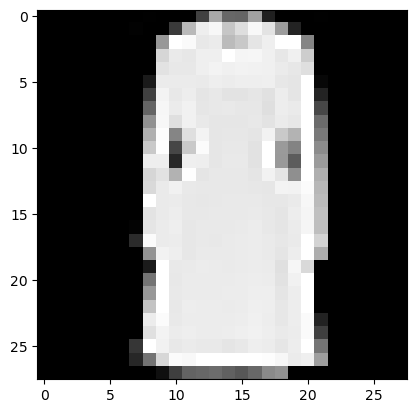

In [94]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x_test = pd.read_csv('Data/X_test.csv', header=None).values
y_test = pd.read_csv('Data/y_test.csv', header=None).values.ravel()

data_point = x_test[4375].reshape(28, 28)

# Display the image
plt.imshow(data_point, cmap='gray')
plt.show()